In [1]:
import pandas as pd

In [2]:
df_exercise = pd.read_csv('exercise.csv')
df_exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190,94,29,105,40.8,231
1,14861698,2,20,166,60,14,94,40.3,66
2,11179863,1,69,179,79,5,88,38.7,26
3,16180408,2,34,179,71,13,100,40.5,71
4,17771927,2,27,154,58,10,81,39.8,35


In [3]:
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.0 MB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
x = df_exercise.drop(['Gender', 'Age', 'Height', 'Weight', 'Duration'], axis=1)
y = df_exercise['Calories']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape,X_train.shape,X_test.shape)
list(y_test[:5])

(15000, 4) (12000, 4) (3000, 4)


[127, 224, 38, 6, 137]

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.random.rand(100, 1)
y = 2 * X + np.random.randn(100, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Predictions: {predictions[:5]}")

Predictions: [[ 0.30742237]
 [-0.22368526]
 [-0.24062807]
 [ 1.04071227]
 [-0.21069026]]


In [6]:
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
model.score(X_train , y_train)


0.38265051736298905

In [8]:
model.score(X_test,y_test)

0.24579275507218612

In [11]:
#pip install pandas numpy matplotlib scikit-learn


In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Adding polynomial features to the data
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(X_train)

# Train a new model with polynomial features (Linear Regression)
poly_model = LinearRegression()
poly_model.fit(x_poly, y_train)

# Transform the test data and make predictions
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

# Metrics Calculation for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression Metrics (With Interaction Terms):")
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2):", r2_poly)



Polynomial Regression Metrics (With Interaction Terms):
Mean Squared Error (MSE): 0.8533412788310321
Root Mean Squared Error (RMSE): 0.9237647313201733
R-squared (R2): 0.2439146919170878


RandomForest Model:
Mean Absolute Error: 57.58888093470419
Mean Squared Error: 4834.266232912637
Root Mean Squared Error: 69.52888775834572
R2 Score: -0.19784836755413826

Linear Regression Model:
Mean Absolute Error: 53.51154386542078
Mean Squared Error: 3939.0053122135027
Root Mean Squared Error: 62.76149545870862
R2 Score: 0.0239819538901902


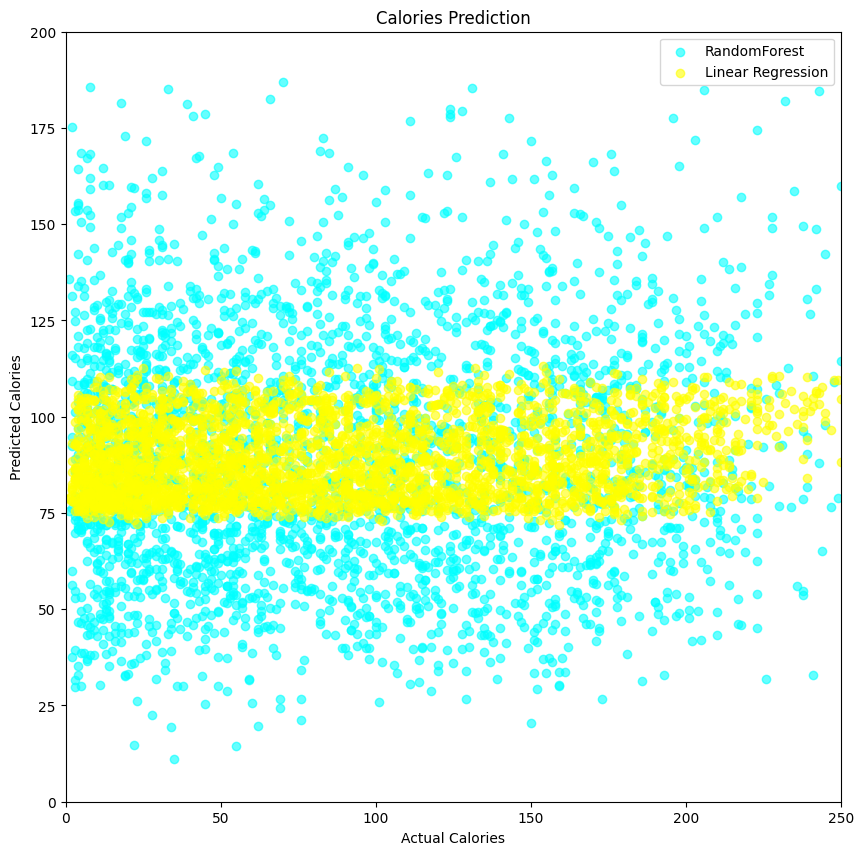

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset (make sure you have the appropriate dataset for calories prediction)
file_path = "exercise.csv"  # Update with your dataset path
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df[['Gender', 'Age','Height', 'Weight']]  # Features
y = df['Calories']  # Target variable (Calories)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization) - Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForest model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Evaluate models
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

# Print evaluation results for both models
print("RandomForest Model:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Root Mean Squared Error: {rf_rmse}")
print(f"R2 Score: {rf_r2}")

print("\nLinear Regression Model:")
print(f"Mean Absolute Error: {lr_mae}")
print(f"Mean Squared Error: {lr_mse}")
print(f"Root Mean Squared Error: {lr_rmse}")
print(f"R2 Score: {lr_r2}")

# Visualize predictions (Actual vs Predicted values for both models)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, rf_pred, label="RandomForest", alpha=0.6, color='cyan')
plt.scatter(y_test, lr_pred, label="Linear Regression", alpha=0.6, color='yellow')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Calories Prediction")
plt.xlim(0, 250) 
plt.ylim(0, 200) 
plt.legend()
plt.show()


In [14]:
# Calculate Accuracy for RandomForest
rf_accuracy = (290 - ((np.mean(abs(y_test - rf_pred) / y_test))) * 100)

# Calculate Accuracy for Linear Regression
lr_accuracy = (290 - ((np.mean(abs(y_test - lr_pred) / y_test))) * 100)

print(f"RandomForest Model Accuracy: {rf_accuracy:.2f}%")
print(f"Linear Regression Model Accuracy: {lr_accuracy:.2f}%")


RandomForest Model Accuracy: 74.36%
Linear Regression Model Accuracy: 86.62%


In [17]:
pip install --upgrade xgboost scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Linear Regression Model:
Mean Absolute Error (MAE): 10.65
Mean Squared Error (MSE): 216.15
Root Mean Squared Error (RMSE): 14.70
R2 Score: 0.95
Mean Absolute Percentage Error (MAPE): 27.47%
Accuracy: 72.53%

Decision Tree Model:
Mean Absolute Error (MAE): 12.19
Mean Squared Error (MSE): 321.89
Root Mean Squared Error (RMSE): 17.94
R2 Score: 0.92
Mean Absolute Percentage Error (MAPE): 16.81%
Accuracy: 83.19%

Random Forest Model:
Mean Absolute Error (MAE): 9.35
Mean Squared Error (MSE): 188.40
Root Mean Squared Error (RMSE): 13.73
R2 Score: 0.95
Mean Absolute Percentage Error (MAPE): 13.10%
Accuracy: 86.90%

Support Vector Regressor Model:
Mean Absolute Error (MAE): 8.77
Mean Squared Error (MSE): 182.27
Root Mean Squared Error (RMSE): 13.50
R2 Score: 0.95
Mean Absolute Percentage Error (MAPE): 15.66%
Accuracy: 84.34%

XGBoost Model:
Mean Absolute Error (MAE): 8.61
Mean Squared Error (MSE): 166.59
Root Mean Squared Error (RMSE): 12.91
R2 Score: 0.96
Mean Absolute Percentage Error (MAPE)

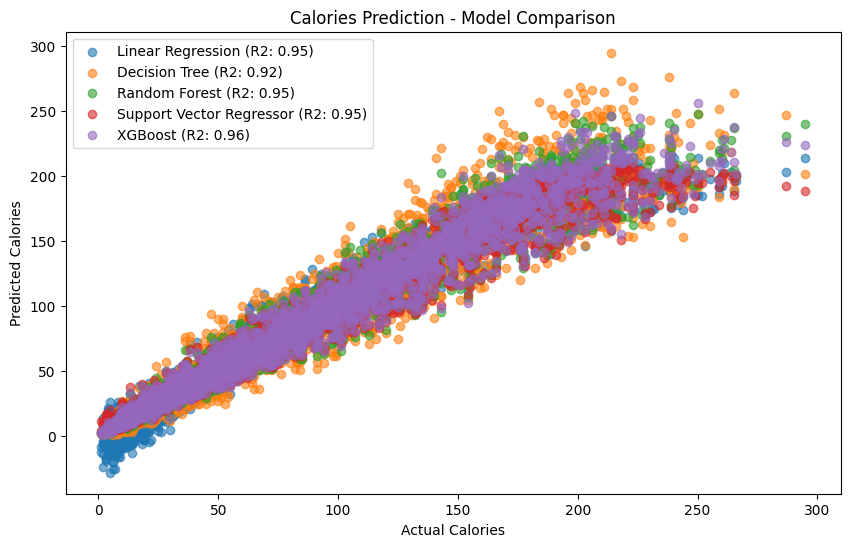

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset (replace with your dataset path)
file_path = "exercise.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)


# Define features and target
X = df.drop(columns=['Gender', 'Age', 'Height', 'Weight','Calories'])  
y = df['Calories']      # Assuming 'Calories' is the target



# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),  # Increased estimators
    "Support Vector Regressor": SVR(kernel='rbf'),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)  # Increased estimators
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    # Calculate accuracy percentage (1 - MAPE)
    accuracy = 100 - mape
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2,
        "MAPE": mape,
        "Accuracy": accuracy
    }

# Print results with accuracy
for name, metrics in results.items():
    print(f"\n{name} Model:")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {metrics['MAPE']:.2f}%")
    print(f"Accuracy: {metrics['Accuracy']:.2f}%")

    
# Visualization: Actual vs Predicted calories and Model Comparison
plt.figure(figsize=(10, 6))

# Plot each model's predictions vs actual values
for name, model in models.items():
    pred = model.predict(X_test)
    plt.scatter(y_test, pred, label=f"{name} (R2: {results[name]['R2 Score']:.2f})", alpha=0.6)

plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Calories Prediction - Model Comparison")
plt.legend()
plt.show()


XGB Model:
Mean Absolute Error: 8.606267929077148
Mean Squared Error: 166.586181640625
Root Mean Squared Error: 12.906826939283915
R2 Score: 0.9587227702140808
Mean Absolute Percentage Error (MAPE): 12.10%
Accuracy: 87.90%


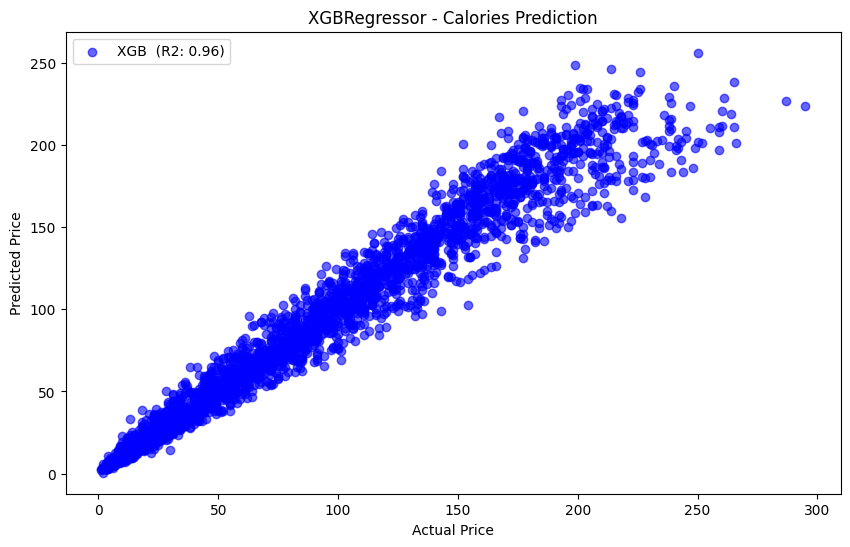

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Load the dataset (replace with your dataset path)
file_path = "exercise.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values
df.dropna(inplace=True)


# Define features and target
X = df.drop(columns=['Gender', 'Age', 'Height', 'Weight','Calories'])  
y = df['Calories']      # Assuming 'Calories' is the target



# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_model= XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)  # Increased estimators
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

# Calculate accuracy percentage
rf_accuracy = 100 - mape
# Print results
print(f"XGB Model:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Accuracy: {rf_accuracy:.2f}%")

# Visualization: Actual vs Predicted prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, label=f"XGB  (R2: {r2:.2f})", alpha=0.6,color="blue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBRegressor - Calories Prediction")
plt.legend()
plt.show()

In [11]:
import pandas as pd
import numpy as np


# Load the dataset (replace with your dataset path)
file_path = "exercise.csv"
df = pd.read_csv(file_path)

# Function to predict future data based on user input
def predict_user_input(gender, age, height, weight, duration):
    # Assuming gender is encoded as integer (0 for Female, 1 for Male)
    user_data = pd.DataFrame({
        'Gender': [gender],
        'Age': [age],
        'Height': [height],
        'Weight': [weight],
        'Duration': [duration],
        # Add missing features with default values (e.g., 0 for missing data)
        'Body_Temp': [body_temp],  # You can set a default value or use a specific strategy (mean/median)
        'Heart_Rate': [heart_rate],  # Default value
        'User_ID': [0]      # Default value
    })
    
    # Ensure the user input has the same columns as the training data
    user_data = user_data.reindex(columns=X.columns, fill_value=0)
    
    # Scaling the user input features using the same scaler
    user_data_scaled = scaler.transform(user_data)
    
    # Making the prediction
    predicted_calories = rf_model.predict(user_data_scaled)
    
    return predicted_calories[0]

# Example of how to use the function with user input
gender = int(input("Enter your Gender (1 for Male, 0 for Female): "))  # Adjusted for binary gender input
age = int(input("Enter your Age: "))
height = int(input("Enter your Height (in cm): "))
weight = int(input("Enter your Weight (in kg): "))
duration = int(input("Enter the Duration of exercise (in minutes): "))
body_temp=int(input("Enter your Boby Temparature : "))
heart_rate=int(input("Enter your HeartBeat Rate : "))
predicted_calories = predict_user_input(gender, age, height, weight, duration)
print(f"Predicted Calories: {predicted_calories:.2f}")


Enter your Gender (1 for Male, 0 for Female):  0
Enter your Age:  20
Enter your Height (in cm):  169
Enter your Weight (in kg):  78
Enter the Duration of exercise (in minutes):  30
Enter your Boby Temparature :  29
Enter your HeartBeat Rate :  98


Predicted Calories: 151.61


In [5]:
correlation = df.corr()
correlation 


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,0.000687,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.001827,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


In [3]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

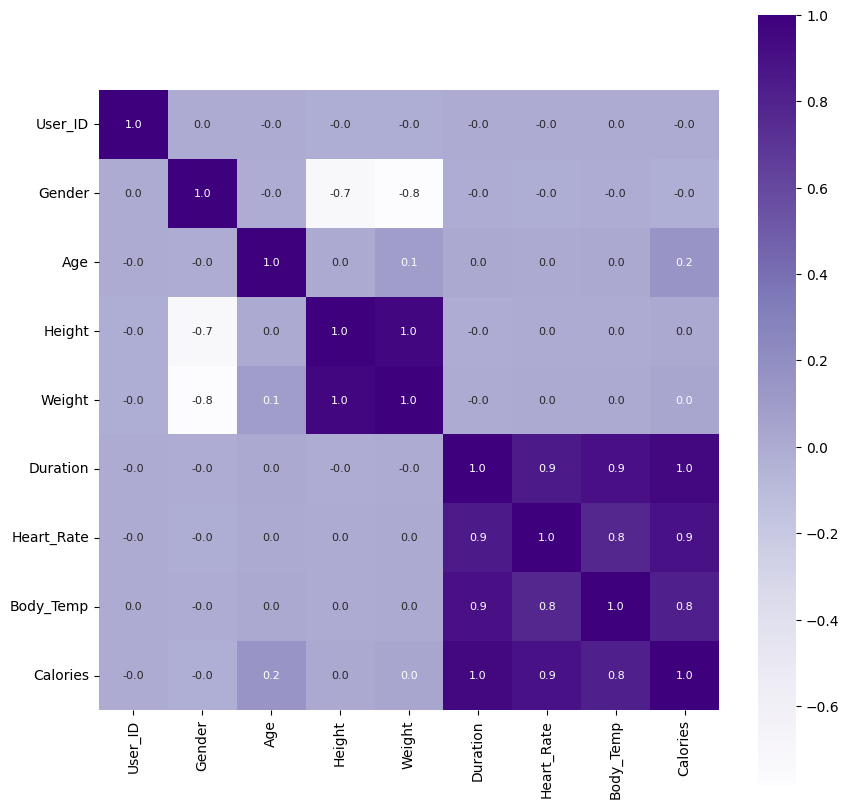

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Purples')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


from sklearn import metrics